En este notebook crearemos cuatro modelos MLP (Multi-Layer Perceptron) uno para cada dataset generado en el notebook _01_Preprocesado_De_Datos_.  

Para el entrenamiento, utilizaremos validación cruzada para series temporales con 10 pliegues y 3 métricas de error RMSE, MSE y MAE.

El procedimiento a seguir para cada modelo es el siguiente:  
- Leemos el dataset correspondiente
- Separamos los datos en entrenamiento y test
- Utilizamos la función _GridSearchCV_ del paquete _sklearn.model_selection_ para descubrir la mejor configuración de hiperparámetros del modelo.
- Generamos un dataframe con los errores para cada medida de error que el modelo ha cometido durante el entrenamiento en cada pliegue de la validación cruzada
- Mostramos en forma de gráfica la predicción del modelo, tanto para el entrenamiento como para el test.
- Mostramos el error cometido durante la predicción del test.

Para simplificar el código de este notebook, se hace uso del módulo de apoyo creado _supporter.py_.

Destacar también que para la generación de los modelos, realizaremos un normalizado de las variables. No obstante, a la hora de mostrar la gráfica del resultado de la predicción, desnormalizaremos la predicción realizada por el modelo.

In [1]:
import pandas as pd
import supporter
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import joblib as joblib
import random
import seaborn as sns

random.seed(7)

#Porcentaje de los datos de entrenamiento
train_size=0.8
#Porcentaje de los datos de Test
test_size=0.2

#Parrilla de hiper-parámetros para GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (100,100,100), (200,200,200),(50,50,50,50), (100,100,100,100), (200,200,200,200)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
    'batch_size' : [10,20,40,80],
    'max_iter' : [20,50,100,200,300,400],
    'momentum': [0.1,0.5,0.9]
}

#Validación cruzada para series temporales
cv = TimeSeriesSplit(n_splits = 10)

# 7 días sin información diaria

In [2]:
df_7d_no_info = pd.read_csv(r'./consumo_diario_03_7d_no_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])

In [3]:
X_train_7d_no_info, X_test_7d_no_info, y_train_7d_no_info, y_test_7d_no_info = supporter.split_train_test(df_7d_no_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)

In [ ]:
mlp = MLPRegressor()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv)
clf_mlp.fit(X_train_7d_no_info, y_train_7d_no_info)

joblib.dump(clf_mlp, 'mlp_7d_no_info_normalizado_clf.pkl')

In [4]:
clf_mlp_7d_no_info_normalizado = joblib.load('mlp_7d_no_info_normalizado_clf.pkl')
clf_mlp_7d_no_info_normalizado.best_params_

{'activation': 'relu',
 'batch_size': 40,
 'hidden_layer_sizes': (50, 50, 50),
 'learning_rate': 'adaptive',
 'max_iter': 100,
 'momentum': 0.1,
 'solver': 'adam'}

In [5]:
predictor_7d_no_info = clf_mlp_7d_no_info_normalizado.best_estimator_

In [6]:
_7d_no_info_RMSE, _7d_no_info_MAE, _7d_no_info_MAPE = supporter.crear_tabla_errores_cv_train(predictor_7d_no_info,
                                        X_train_7d_no_info, y_train_7d_no_info, cv, '7 días sin información diaria')

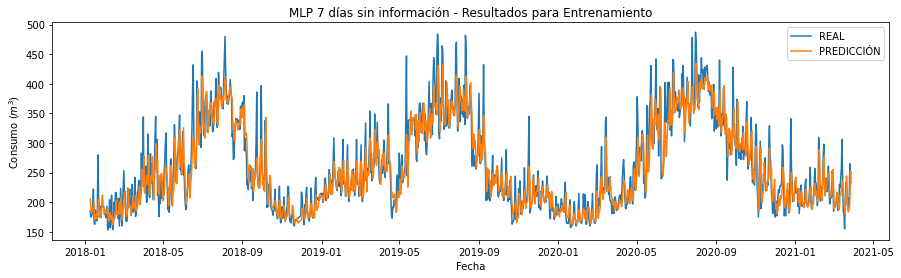

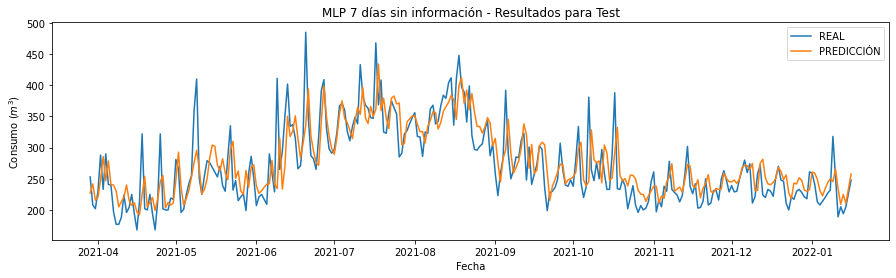

In [7]:
supporter.grafica_resultado(predictor_7d_no_info,"MLP 7 días sin información", df_7d_no_info,
                            train_size,test_size,show_scaled=False)

In [8]:
supporter.regression_results(y_test_7d_no_info, predictor_7d_no_info.predict(X_test_7d_no_info))

r2:  0.64
MAE:  0.08
MSE:  0.01
RMSE:  0.11
MAPE (%):  21.87
CC:  0.805


# 7 días con información diaria

In [9]:
df_7d_info = pd.read_csv(r'./consumo_diario_03_7d_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])

In [10]:
X_train_7d_info, X_test_7d_info, y_train_7d_info, y_test_7d_info = supporter.split_train_test(df_7d_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)

In [ ]:
mlp = MLPRegressor()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv)
clf_mlp.fit(X_train_7d_info, y_train_7d_info)

joblib.dump(clf_mlp, 'mlp_7d_info_normalizado_clf.pkl')

In [11]:
clf_mlp_7d_info_normalizado = joblib.load('mlp_7d_info_normalizado_clf.pkl')
clf_mlp_7d_info_normalizado.best_params_

{'activation': 'tanh',
 'batch_size': 40,
 'hidden_layer_sizes': (200, 200, 200),
 'learning_rate': 'adaptive',
 'max_iter': 400,
 'momentum': 0.9,
 'solver': 'adam'}

In [12]:
predictor_7d_info = clf_mlp_7d_info_normalizado.best_estimator_

In [13]:
_7d_info_RMSE, _7d_info_MAE, _7d_info_MAPE = supporter.crear_tabla_errores_cv_train(predictor_7d_info,
                                            X_train_7d_info, y_train_7d_info, cv, '7 días con información diaria')

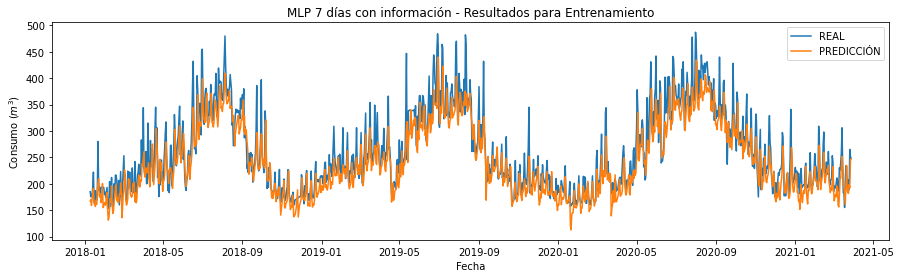

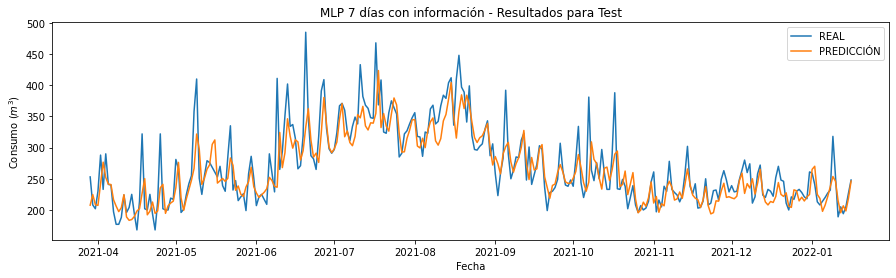

In [14]:
supporter.grafica_resultado(predictor_7d_info,"MLP 7 días con información", df_7d_info,
                            train_size,test_size,show_scaled=False)

In [15]:
supporter.regression_results(y_test_7d_info, predictor_7d_info.predict(X_test_7d_info))

r2:  0.64
MAE:  0.08
MSE:  0.01
RMSE:  0.11
MAPE (%):  22.32
CC:  0.851


# 14 días sin información diaria

In [16]:
df_14d_no_info = pd.read_csv(r'./consumo_diario_03_14d_no_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])

In [17]:
X_train_14d_no_info, X_test_14d_no_info, y_train_14d_no_info, y_test_14d_no_info = supporter.split_train_test(df_14d_no_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)

In [ ]:
mlp = MLPRegressor()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv)
clf_mlp.fit(X_train_14d_no_info, y_train_14d_no_info)

joblib.dump(clf_mlp, 'mlp_14d_no_info_normalizado_clf.pkl')

In [18]:
clf_mlp_14d_no_info_normalizado = joblib.load('mlp_14d_no_info_normalizado_clf.pkl')
clf_mlp_14d_no_info_normalizado.best_params_

{'activation': 'tanh',
 'batch_size': 20,
 'hidden_layer_sizes': (50, 50, 50, 50),
 'learning_rate': 'constant',
 'max_iter': 20,
 'momentum': 0.1,
 'solver': 'adam'}

In [19]:
predictor_14d_no_info = clf_mlp_14d_no_info_normalizado.best_estimator_

In [20]:
_14d_no_info_RMSE, _14d_no_info_MAE, _14d_no_info_MAPE = supporter.crear_tabla_errores_cv_train(predictor_14d_no_info,
                                            X_train_14d_no_info, y_train_14d_no_info, cv,'14 días sin información diaria')

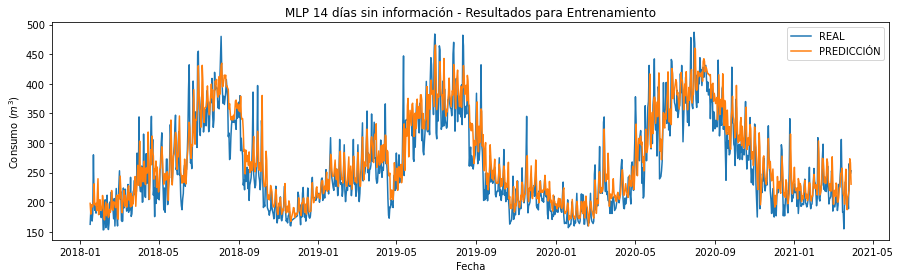

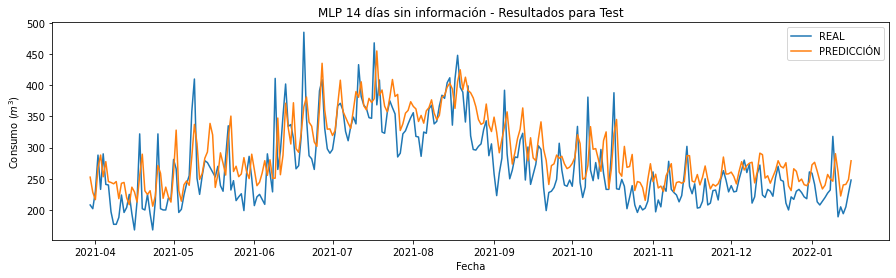

In [21]:
supporter.grafica_resultado(predictor_14d_no_info,"MLP 14 días sin información", df_14d_no_info,
                            train_size,test_size,show_scaled=False)

In [22]:
supporter.regression_results(y_test_14d_no_info, predictor_14d_no_info.predict(X_test_14d_no_info))

r2:  0.6
MAE:  0.09
MSE:  0.01
RMSE:  0.12
MAPE (%):  25.0
CC:  0.811


# 14 días con información diaria

In [23]:
df_14d_info = pd.read_csv(r'./consumo_diario_03_14d_info.csv',parse_dates=["Fecha"], index_col=["Fecha"])

In [24]:
X_train_14d_info, X_test_14d_info, y_train_14d_info, y_test_14d_info = supporter.split_train_test(df_14d_info,
                                                train_size_=train_size,test_size_=test_size,scale=True,verbose=False)

In [ ]:
mlp = MLPRegressor()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=cv)
clf_mlp.fit(X_train_14d_info, y_train_14d_info)

joblib.dump(clf_mlp, 'mlp_14d_info_normalizado_clf.pkl')

In [25]:
clf_mlp_14d_info_normalizado = joblib.load('mlp_14d_info_normalizado_clf.pkl')
clf_mlp_14d_info_normalizado.best_params_

{'activation': 'tanh',
 'batch_size': 10,
 'hidden_layer_sizes': (200, 200, 200, 200),
 'learning_rate': 'constant',
 'max_iter': 200,
 'momentum': 0.1,
 'solver': 'adam'}

In [26]:
predictor_14d_info = clf_mlp_14d_info_normalizado.best_estimator_

In [27]:
_14d_info_RMSE, _14d_info_MAE, _14d_info_MAPE = supporter.crear_tabla_errores_cv_train(predictor_14d_info,
                                            X_train_14d_info, y_train_14d_info, cv,'14 días con información diaria')

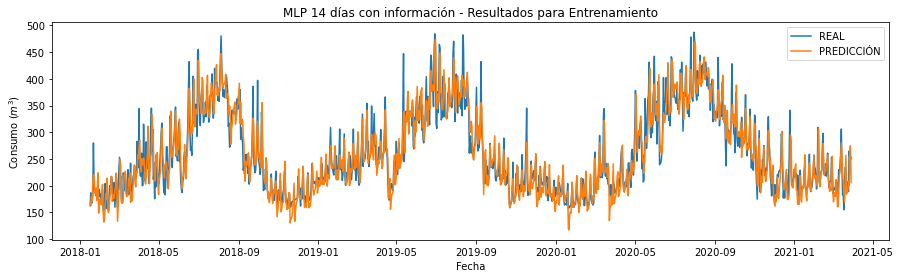

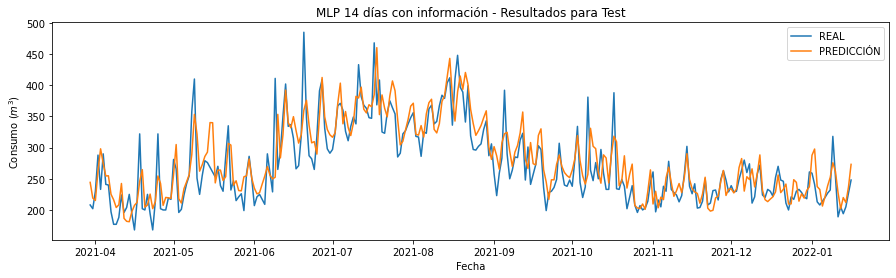

In [28]:
supporter.grafica_resultado(predictor_14d_info,"MLP 14 días con información", df_14d_info,
                            train_size,test_size,show_scaled=False)

In [29]:
supporter.regression_results(y_test_14d_info, predictor_14d_info.predict(X_test_14d_info))

r2:  0.71
MAE:  0.07
MSE:  0.01
RMSE:  0.1
MAPE (%):  20.26
CC:  0.855


# Juntamos todos los errores de entrenamiento

#### RMSE

In [30]:
errores_training_rmse = pd.concat([_7d_no_info_RMSE, _7d_info_RMSE, _14d_no_info_RMSE, _14d_info_RMSE], axis=1)
errores_training_rmse

,7 días sin información diaria,7 días con información diaria,14 días sin información diaria,14 días con información diaria
Pliegues,,,,
Pliegue 1,0.224295,0.134139,0.193012,0.145575
Pliegue 2,0.102107,0.088372,0.087865,0.100965
Pliegue 3,0.064805,0.064875,0.061403,0.073133
Pliegue 4,0.122079,0.101797,0.125876,0.101501
Pliegue 5,0.112007,0.101095,0.111675,0.101508
Pliegue 6,0.061791,0.059599,0.066352,0.063826
Pliegue 7,0.083107,0.073362,0.085105,0.070429
Pliegue 8,0.118010,0.103462,0.118364,0.104204
Pliegue 9,0.101625,0.090997,0.098194,0.084723


In [31]:
errores_training_rmse.to_csv("./mlp_rmse_training.csv")

[Text(0.5, 0, 'Dataset utilizado'), Text(0, 0.5, 'RMSE')]

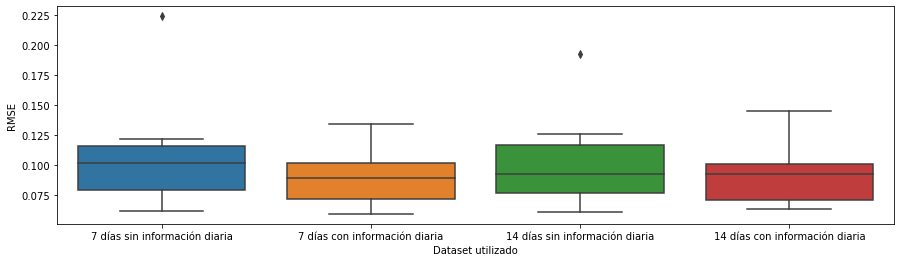

In [32]:
sns.boxplot(data=errores_training_rmse).set(xlabel='Dataset utilizado', ylabel='RMSE')

#### MAE

In [33]:
errores_training_mae = pd.concat([_7d_no_info_MAE, _7d_info_MAE, _14d_no_info_MAE, _14d_info_MAE], axis=1)
errores_training_mae

,7 días sin información diaria,7 días con información diaria,14 días sin información diaria,14 días con información diaria
Pliegues,,,,
Pliegue 1,0.162599,0.094077,0.135823,0.104102
Pliegue 2,0.058266,0.051738,0.038115,0.067508
Pliegue 3,0.045488,0.039536,0.039244,0.037887
Pliegue 4,0.076670,0.055852,0.079776,0.060449
Pliegue 5,0.070007,0.060446,0.059400,0.061495
Pliegue 6,0.035501,0.036887,0.038045,0.035737
Pliegue 7,0.040292,0.046933,0.043097,0.051419
Pliegue 8,0.066885,0.067063,0.077266,0.069339
Pliegue 9,0.067713,0.063213,0.064734,0.055637


In [34]:
errores_training_mae.to_csv("./mlp_mae_training.csv")

[Text(0.5, 0, 'Dataset utilizado'), Text(0, 0.5, 'MAE')]

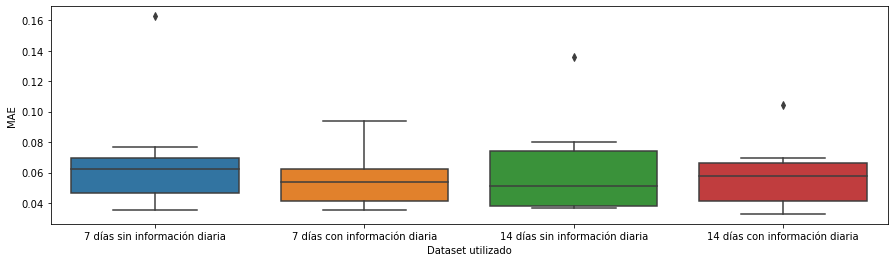

In [35]:
sns.boxplot(data=errores_training_mae).set(xlabel='Dataset utilizado', ylabel='MAE')

#### MAPE

In [36]:
errores_training_mape = pd.concat([_7d_no_info_MAPE, _7d_info_MAPE, _14d_no_info_MAPE, _14d_info_MAPE], axis=1)
errores_training_mape

,7 días sin información diaria,7 días con información diaria,14 días sin información diaria,14 días con información diaria
Pliegues,,,,
Pliegue 1,37.543272,26.337198,33.982550,32.157148
Pliegue 2,49.678540,43.500844,32.778011,52.828046
Pliegue 3,28.556598,27.416890,24.256274,23.650975
Pliegue 4,28.054199,21.439771,27.207903,19.789207
Pliegue 5,23.542697,20.440116,22.806880,23.062300
Pliegue 6,55.003723,52.565586,46.249912,39.024866
Pliegue 7,41.300806,40.719081,39.405883,53.039603
Pliegue 8,15.176552,13.576241,16.155025,13.043959
Pliegue 9,29.137055,26.160075,30.063673,23.264404


In [37]:
errores_training_mape.to_csv("./mlp_mape_training.csv")

[Text(0.5, 0, 'Dataset utilizado'), Text(0, 0.5, 'MAPE')]

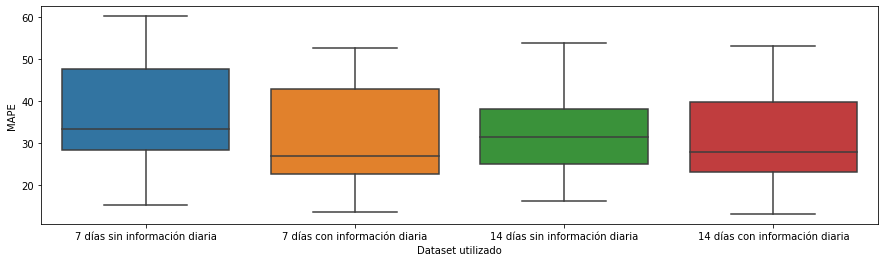

In [38]:
sns.boxplot(data=errores_training_mape).set(xlabel='Dataset utilizado', ylabel='MAPE')